In [1]:
import re 
import pdfplumber

import csv

DATE_STRING = '2020-06-10'

outfile = 'covid_hospitals_0610.csv'
outfileh = open(outfile, 'w')
writer = csv.writer(outfileh)

writer.writerow(['hospital','count_total','count_confirmed', 'date'])



43

In [2]:
settings = {
    "vertical_strategy": "lines", 
    "horizontal_strategy": "lines",
    "snap_tolerance": 3,
    "join_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "keep_blank_chars": False,
    "text_tolerance": 3,
    "text_x_tolerance": None,
    "text_y_tolerance": None,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": None,
    "intersection_y_tolerance": None,
}


In [4]:



file = '../or_weekly_reports/COVID-19-Weekly-Report-2020-06-10-FINAL.pdf'
pdf = pdfplumber.open(file)
pagenumber = 10

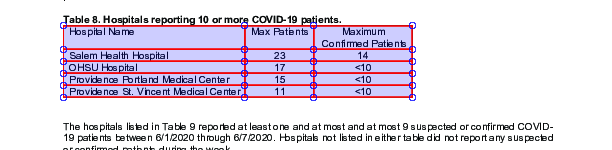

In [5]:
#im = pdf.pages[pagenumber].to_image()
width = pdf.pages[pagenumber].width
box1 = (0, 250,  width, 400)

cropped_page = pdf.pages[pagenumber].crop(box1) 
im = cropped_page.to_image()
im.debug_tablefinder()

In [6]:
table_found = cropped_page.extract_table(table_settings={})
result_count = len(table_found)
# Skip the header row
for i in range(1,result_count):
    this_row = table_found[i]
    print(this_row)
    assert len(this_row)==3
    this_row.append(DATE_STRING)
    
    writer.writerow(this_row)
    

['Salem Health Hospital', '23', '14']
['OHSU Hospital', '17', '<10']
['Providence Portland Medical Center', '15', '<10']
['Providence St. Vincent Medical Center', '11', '<10']


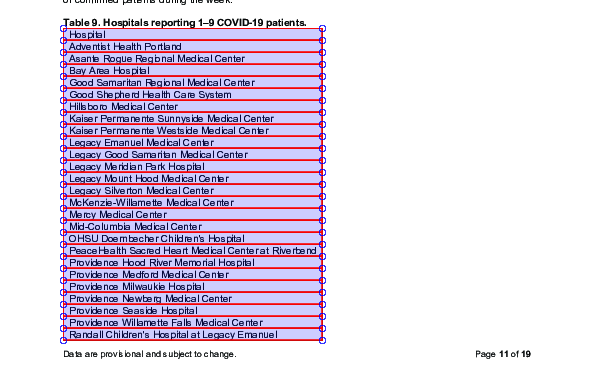

In [7]:

#im = pdf.pages[pagenumber].to_image()
width = pdf.pages[pagenumber].width
height = pdf.pages[pagenumber].height
box2 = (0, 400,  width, height)

cropped_page = pdf.pages[pagenumber].crop(box2) 
result = cropped_page.extract_table()

im = cropped_page.to_image()
im.debug_tablefinder()

In [8]:
table_found = cropped_page.extract_table(table_settings={})
result_count = len(table_found)
# Skip the header row
for i in range(1,result_count):
    this_hospital = table_found[i][0]
    this_row = [this_hospital, '<10','<10',DATE_STRING]
    print(this_row)
    writer.writerow(this_row)

['Adventist Health Portland', '<10', '<10', '2020-06-10']
['Asante Rogue Regional Medical Center', '<10', '<10', '2020-06-10']
['Bay Area Hospital', '<10', '<10', '2020-06-10']
['Good Samaritan Regional Medical Center', '<10', '<10', '2020-06-10']
['Good Shepherd Health Care System', '<10', '<10', '2020-06-10']
['Hillsboro Medical Center', '<10', '<10', '2020-06-10']
['Kaiser Permanente Sunnyside Medical Center', '<10', '<10', '2020-06-10']
['Kaiser Permanente Westside Medical Center', '<10', '<10', '2020-06-10']
['Legacy Emanuel Medical Center', '<10', '<10', '2020-06-10']
['Legacy Good Samaritan Medical Center', '<10', '<10', '2020-06-10']
['Legacy Meridian Park Hospital', '<10', '<10', '2020-06-10']
['Legacy Mount Hood Medical Center', '<10', '<10', '2020-06-10']
['Legacy Silverton Medical Center', '<10', '<10', '2020-06-10']
['McKenzie-Willamette Medical Center', '<10', '<10', '2020-06-10']
['Mercy Medical Center', '<10', '<10', '2020-06-10']
['Mid-Columbia Medical Center', '<10', 

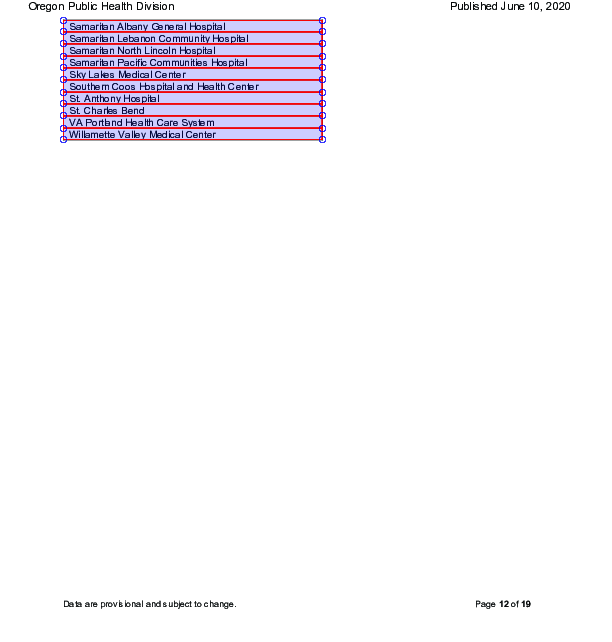

In [9]:
width = pdf.pages[pagenumber+1].width
height = pdf.pages[pagenumber+1].height

box1 = (0, 150,  width, height)

cropped_page = pdf.pages[pagenumber+1].crop(box1) 
im = cropped_page.to_image()
im.debug_tablefinder()

In [10]:
table_found = cropped_page.extract_table(table_settings={})

result_count = len(table_found)
# Skip the header row
for i in range(0,result_count):
    this_hospital = table_found[i][0]
    this_row = [this_hospital, '<10','<10',DATE_STRING]
    print(this_row)
    writer.writerow(this_row)

['Samaritan Albany General Hospital', '<10', '<10', '2020-06-10']
['Samaritan Lebanon Community Hospital', '<10', '<10', '2020-06-10']
['Samaritan North Lincoln Hospital', '<10', '<10', '2020-06-10']
['Samaritan Pacific Communities Hospital', '<10', '<10', '2020-06-10']
['Sky Lakes Medical Center', '<10', '<10', '2020-06-10']
['Southern Coos Hospital and Health Center', '<10', '<10', '2020-06-10']
['St. Anthony Hospital', '<10', '<10', '2020-06-10']
['St. Charles Bend', '<10', '<10', '2020-06-10']
['VA Portland Health Care System', '<10', '<10', '2020-06-10']
['Willamette Valley Medical Center', '<10', '<10', '2020-06-10']


In [11]:
outfileh.close()
